# Mapa País

## Importar librerias
Inicialmente importamos las librerias necesarias para el funcionamiento del notebook.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

## Asignación de variables
Se define tambien la ruta del csv y del geojson.

In [2]:
ruta_csv = '../../../data/processed_data/maestro/csv_maestro_regiones.csv'
archivo_geojson = 'regiones.json'

## Configuracion de graficos
Asignamos el tamaño de los graficos y mapas. Tambien opcionalmente podemos ocultar los titulos del grafico y aumentar el tamaño de la letra de estos.

In [3]:
# Tamaño de los graficos y mapas
graph_size = (9, 6)
map_size = (9, 8)

plt.rcParams['axes.titlecolor'] = 'none' 

plt.rcParams['axes.titlesize'] = 0

plt.rcParams.update({'font.size': 14})

## Importar el geojson
Cargamos el archivo correspondiente geoJson del país que se encuentra en la misma carpeta del notebook.

In [4]:
# Cargar el archivo .geojson
gdf = gpd.read_file(archivo_geojson)

## Importación y merge
Inicialmente se debe importar el csv y unir con el gdf.

In [5]:
# Leer el CSV
df = pd.read_csv(ruta_csv)

In [6]:
merge_df = gdf.merge(
    df,
    left_on='codregion',     
    right_on='cod_region',  
    how='inner'
)

## Poblacion migrante por región

### Grafico de resultados - Poblacion migrante (%)
Se grafican los resultados obtenidos en orden ascendente.

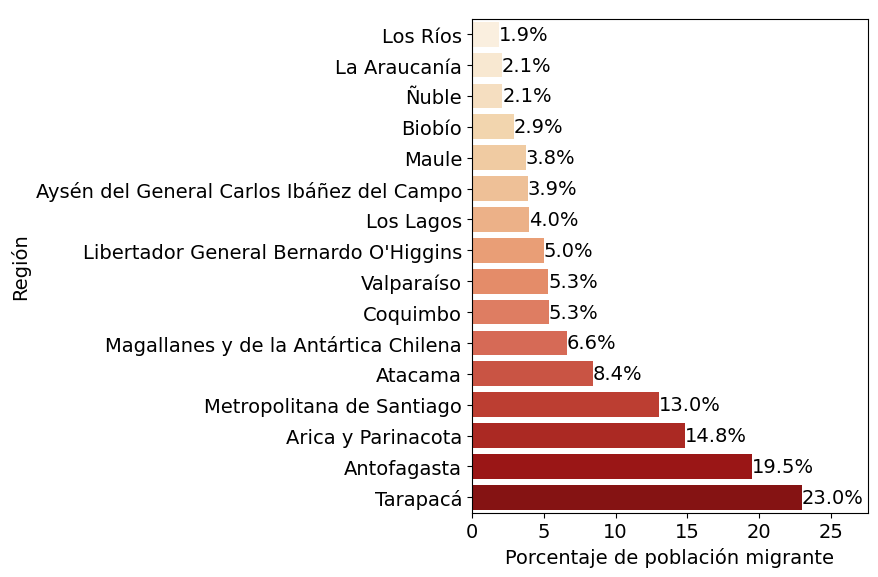

In [7]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrante_total", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrante_total", y="Región", data=df_plot, palette="OrRd", hue="Región")

plt.xlabel("Porcentaje de población migrante")
plt.ylabel("Región")
plt.title(f"Porcentaje de población migrante por región")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrante_total"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrante_total"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()

# Guardar
plt.savefig(
    "../../../figures/pais/poblacion_migrante_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)

plt.show()

### Crear Mapa - Poblacion migrante (%)
Se grafican los resultados obtenidos en un mapa de coropletas

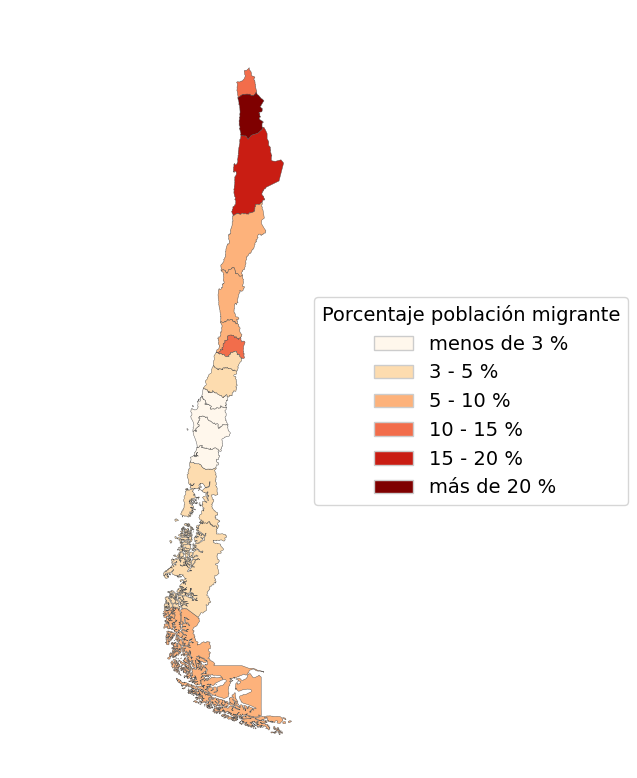

In [8]:
# Crear categorías manuales
bins = [0, 3, 5, 10, 15, 20, 100]
labels = ["menos de 3 %", "3 - 5 %", "5 - 10 %", "10 - 15 %", "15 - 20 %", "más de 20 %"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrante_total"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje población migrante",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 


# Título y formato
ax.set_title(f"Porcentaje de población migrante por región", fontsize=14)
ax.axis("off")

plt.tight_layout()

# Guardar
plt.savefig(
    "../../../figures/pais/poblacion_migrante_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)

plt.show()

## Porcentaje beneficiario FONASA migrante


### Grafico de resultados - FONASA migrante (%)
Se grafican los resultados obtenidos en orden ascendente.

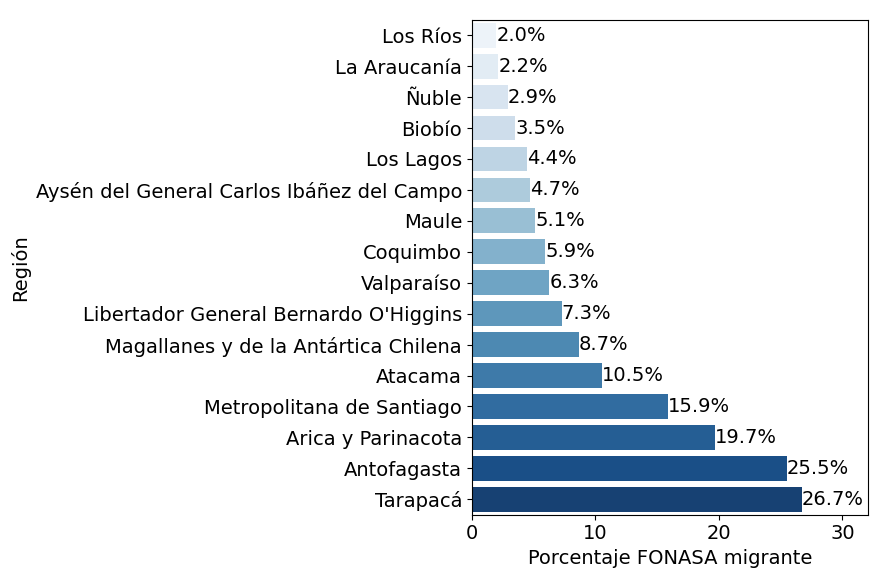

In [9]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrante_fonasa", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrante_fonasa", y="Región", data=df_plot, palette="Blues", hue="Región")

plt.xlabel("Porcentaje FONASA migrante")
plt.ylabel("Región")
plt.title(f"Proporción de migrantes entre beneficiarios de Fonasa por región")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrante_fonasa"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrante_fonasa"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/fonasa_migrante_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - FONASA migrante (%)
Se grafican los resultados obtenidos en un mapa de coropletas

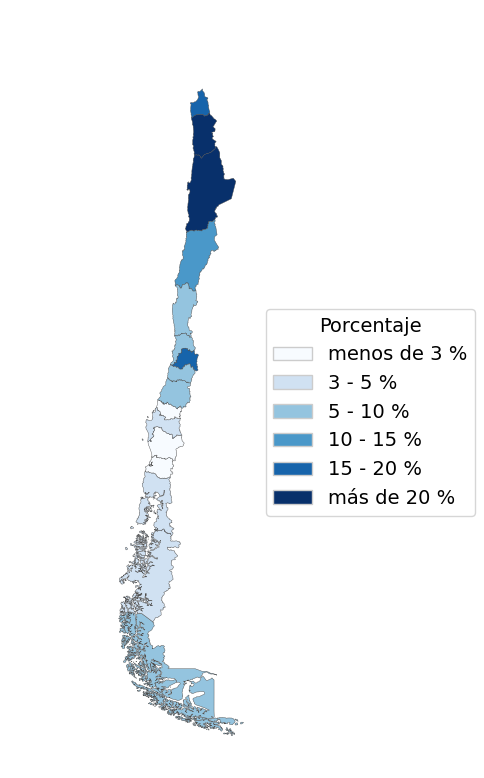

In [10]:
# Crear categorías manuales
bins = [0, 3, 5, 10, 15, 20, 100]
labels = ["menos de 3 %", "3 - 5 %", "5 - 10 %", "10 - 15 %", "15 - 20 %", "más de 20 %"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrante_fonasa"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 

# Título y formato
ax.set_title(f"Porcentaje de migrantes entre\n beneficiarios de Fonasa por región", fontsize=14)
ax.axis("off")

plt.tight_layout()
# Guardar
plt.savefig(
    "../../../figures/pais/fonasa_migrante_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Ruralidad y nivel de ingresos


### Grafico de resultados - Ruralidad
Se grafican los resultados obtenidos en orden ascendente.

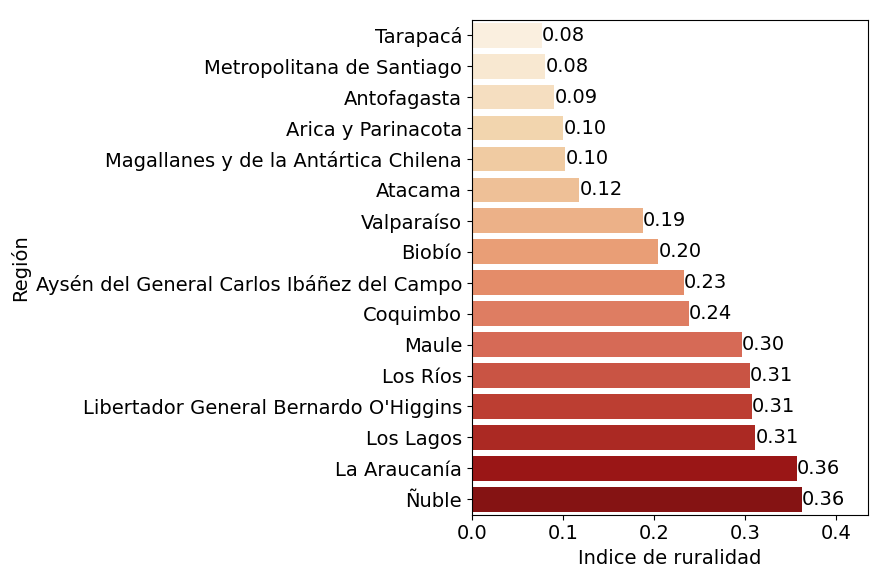

In [11]:
# Ordenar comunas
df_plot = merge_df.sort_values("ruralidad", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="ruralidad", y="Región", data=df_plot, palette="OrRd", hue="Región")

plt.xlabel("Indice de ruralidad")
plt.ylabel("Región")
plt.title(f"Indice de ruralidad por región")

# Calculamos el valor máximo de la columna
max_valor = df_plot["ruralidad"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["ruralidad"]):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/ruralidad_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Ruralidad
Se grafican los resultados obtenidos en un mapa de coropletas

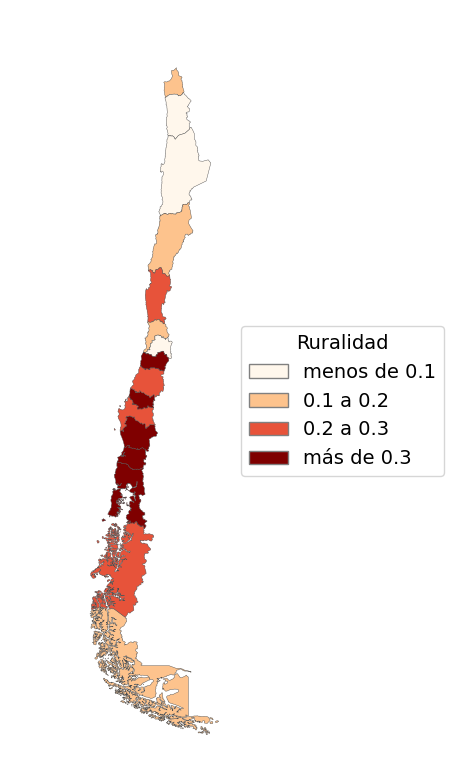

In [12]:
# Crear categorías manuales
bins = [0, 0.1, 0.2, 0.3, 1]
labels = ["menos de 0.1", "0.1 a 0.2", "0.2 a 0.3", "más de 0.3"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["ruralidad"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.5', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Ruralidad",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 
# Título y formato
ax.set_title(f"Indice de ruralidad por región", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/ruralidad_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Nivel de ingresos promedio
Se grafican los resultados obtenidos en orden ascendente.

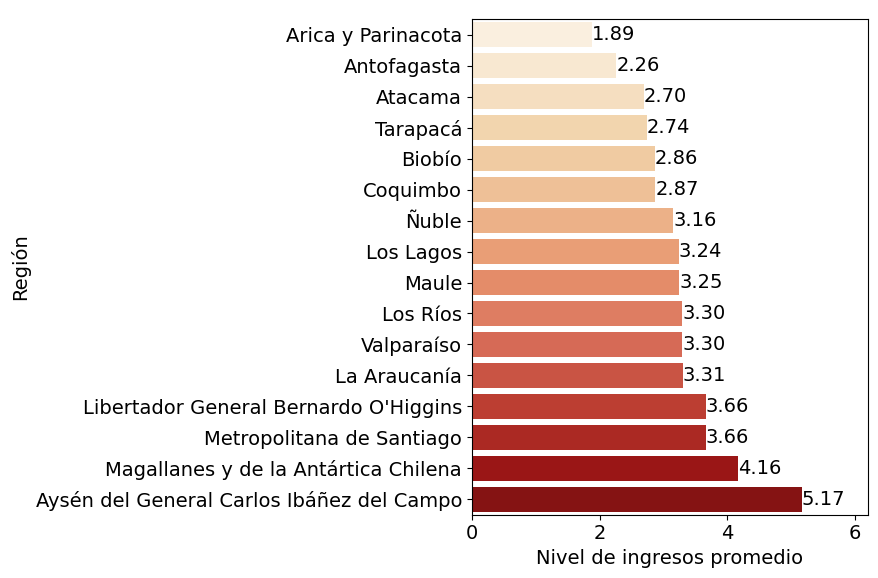

In [13]:
# Ordenar comunas
df_plot = merge_df.sort_values("nivel_promedio", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="nivel_promedio", y="Región", data=df_plot, palette="OrRd", hue="Región")

plt.xlabel("Nivel de ingresos promedio")
plt.ylabel("Región")
plt.title(f"Nivel de ingresos promedio por region")

# Calculamos el valor máximo de la columna
max_valor = df_plot["nivel_promedio"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["nivel_promedio"]):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/nivel_ingreso_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear mapa - Nivel de ingresos promedio

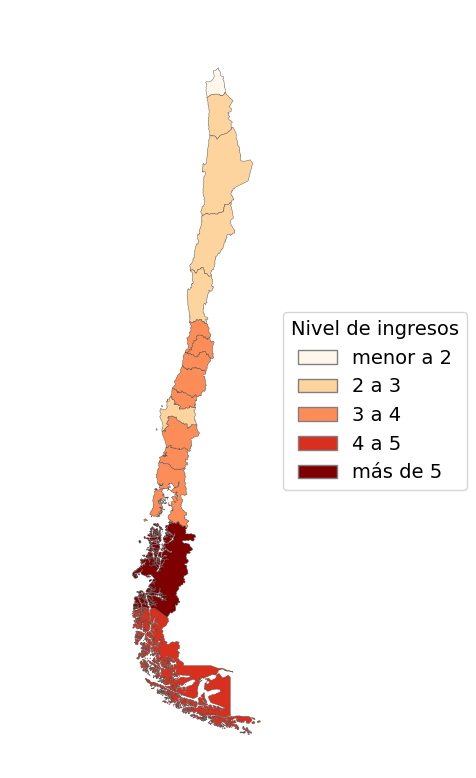

In [14]:
# Crear categorías manuales
bins = [1, 2, 3, 4, 5, 7]
labels = ["menor a 2", "2 a 3", "3 a 4", "4 a 5", "más de 5"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["nivel_promedio"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.5', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Nivel de ingresos",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)


ax.set_xlim(-76, -66) 
# Título y formato
ax.set_title(f"Nivel de ingresos promedio por región", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/nivel_ingreso_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Desviacion estandar
Se grafican los resultados obtenidos en orden ascendente.

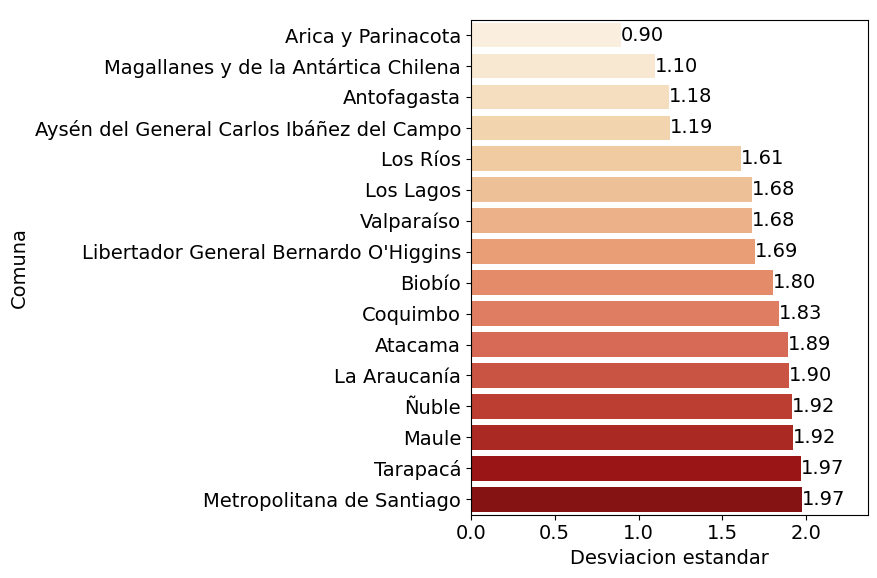

In [15]:
# Ordenar comunas
df_plot = merge_df.sort_values("desviacion_estandar", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="desviacion_estandar", y="Región", data=df_plot, palette="OrRd", hue="Región")

plt.xlabel("Desviacion estandar")
plt.ylabel("Comuna")
plt.title(f"Desviacion estandar, nivel de ingresos por comuna")

# Calculamos el valor máximo de la columna
max_valor = df_plot["desviacion_estandar"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["desviacion_estandar"]):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/desviacion_estandar_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Desviacion estandar
Se grafican los resultados obtenidos en un mapa de coropletas

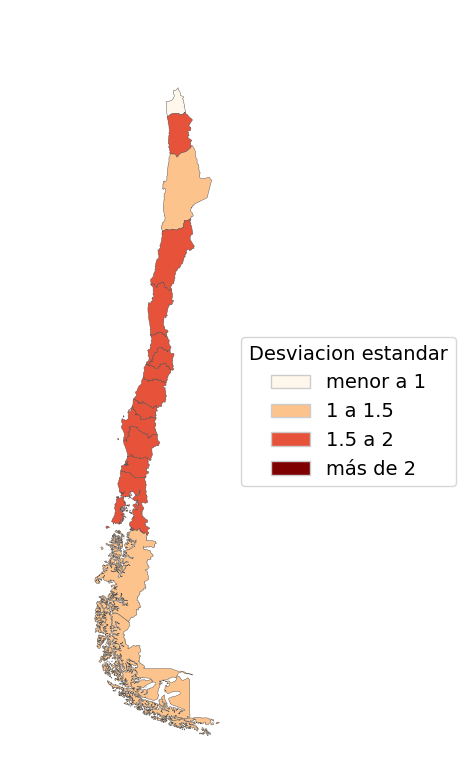

In [16]:
# Crear categorías manuales
bins = [0, 1, 1.5, 2, 3]
labels = ["menor a 1","1 a 1.5","1.5 a 2","más de 2"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["desviacion_estandar"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("OrRd", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Desviacion estandar",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_xlim(-76, -66) 
ax.set_title(f"Desviacion estandar,\n nivel de ingresos por comuna", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/desviacion_estandar_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Red publica de salud

### Grafico de resultados - Centros por 10.000 habitantes
Se grafican los resultados obtenidos en orden ascendente.

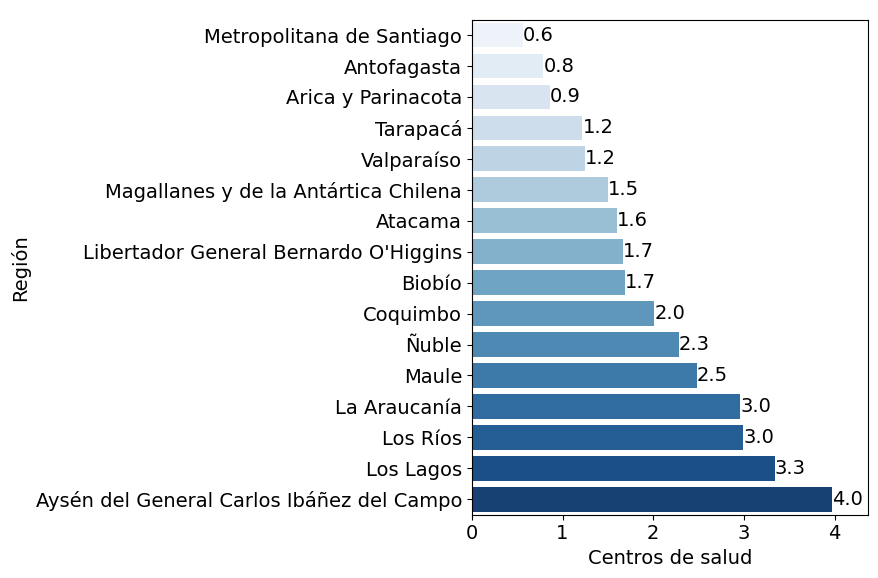

In [17]:
# Ordenar comunas
df_plot = merge_df.sort_values("tasa_centros_10k", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="tasa_centros_10k", y="Región", data=df_plot, palette="Blues", hue="Región")

plt.xlabel("Centros de salud")
plt.ylabel("Región")
plt.title(f"Centros de salud publicos por cada 10.000 habitantes")

# Calculamos el valor máximo de la columna
max_valor = df_plot["tasa_centros_10k"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.1)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["tasa_centros_10k"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.tight_layout()
plt.savefig(
    "../../../figures/pais/centros_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Centros por 10.000 habitantes
Se grafican los resultados obtenidos en un mapa de coropletas

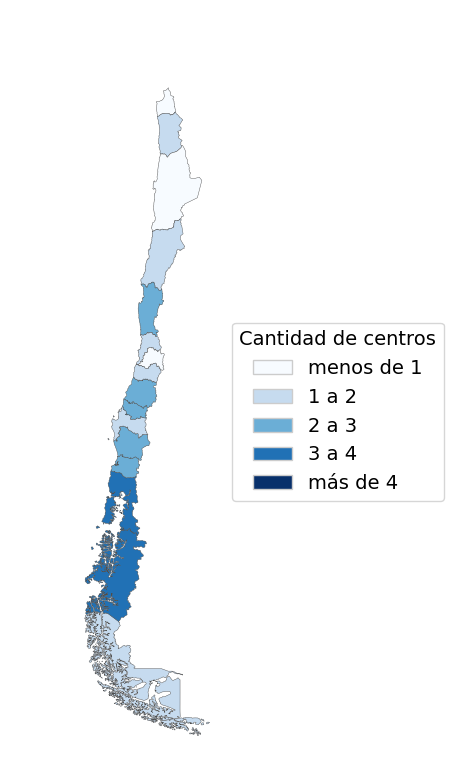

In [18]:
bins = [0, 1, 2, 3, 4, 5]
labels = ["menos de 1", "1 a 2", "2 a 3", "3 a 4", "más de 4"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["tasa_centros_10k"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Cantidad de centros",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 
# Título y formato
ax.set_title(f"Centros de salud publicos\n por cada 10.000 habitantes", fontsize=14)
ax.axis("off")

plt.tight_layout()
# Guardar
plt.savefig(
    "../../../figures/pais/centros_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Atenciones en red publica de salud

### Grafico de resultados - Atenciones por 10.000 habitantes
Se grafican los resultados obtenidos en orden ascendente.

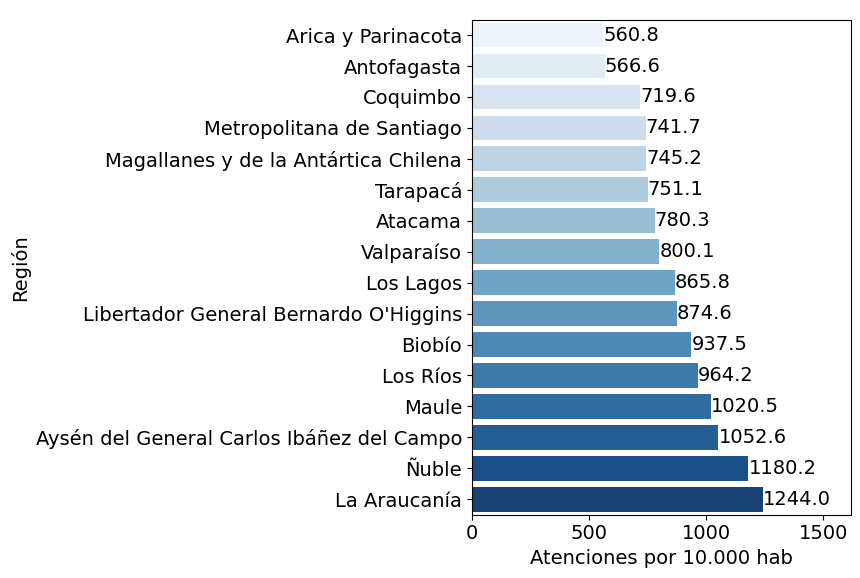

In [19]:
# Ordenar comunas
df_plot = merge_df.sort_values("tasa_atenciones_10k", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="tasa_atenciones_10k", y="Región", data=df_plot, palette="Blues", hue="Región")

plt.xlabel("Atenciones por 10.000 hab")
plt.ylabel("Región")
plt.title(f"Atenciones en salud publica por cada 10.000 habitantes")

# Calculamos el valor máximo de la columna
max_valor = df_plot["tasa_atenciones_10k"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.3)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["tasa_atenciones_10k"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/atenciones_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Atenciones por 10.000 habitantes
Se grafican los resultados obtenidos en un mapa de coropletas

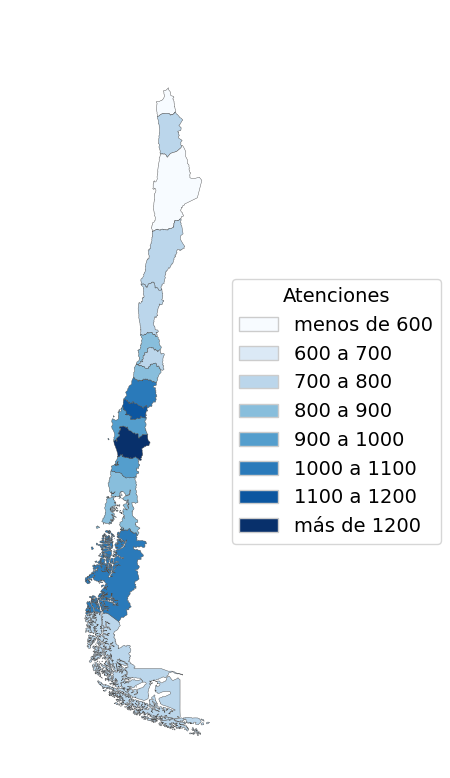

In [20]:
bins = [0, 600, 700, 800, 900, 1000, 1100, 1200, 10000]
labels = ["menos de 600", "600 a 700", "700 a 800", "800 a 900", "900 a 1000", "1000 a 1100", "1100 a 1200","más de 1200"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["tasa_atenciones_10k"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Atenciones",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

# Título y formato
ax.set_xlim(-76, -66) 
ax.set_title(f"Atenciones en salud publica\n por cada 10.000 habitantes", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.tight_layout()
plt.savefig(
    "../../../figures/pais/atenciones_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Grafico de resultados - Porcentaje de atencion migrantes
Se grafican los resultados obtenidos en orden ascendente.

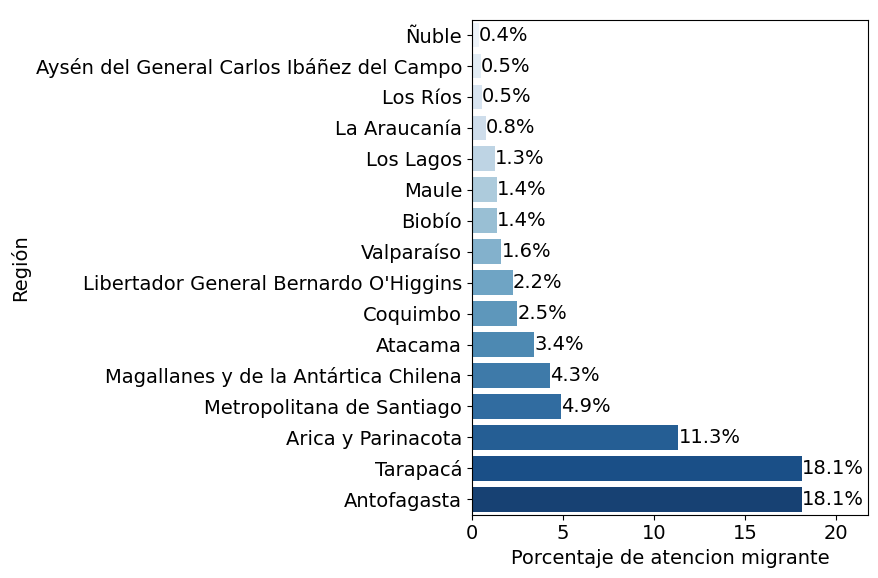

In [21]:
# Ordenar comunas
df_plot = merge_df.sort_values("porcentaje_migrantes_promedio", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="porcentaje_migrantes_promedio", y="Región", data=df_plot, palette="Blues", hue="Región")

plt.xlabel("Porcentaje de atencion migrante")
plt.ylabel("Región")
plt.title(f"Porcentaje de atencion migrante en salud publica")

# Calculamos el valor máximo de la columna
max_valor = df_plot["porcentaje_migrantes_promedio"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)


# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["porcentaje_migrantes_promedio"]):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/atenciones_migrante_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Porcentaje de atencion migrantes
Se grafican los resultados obtenidos en un mapa de coropletas

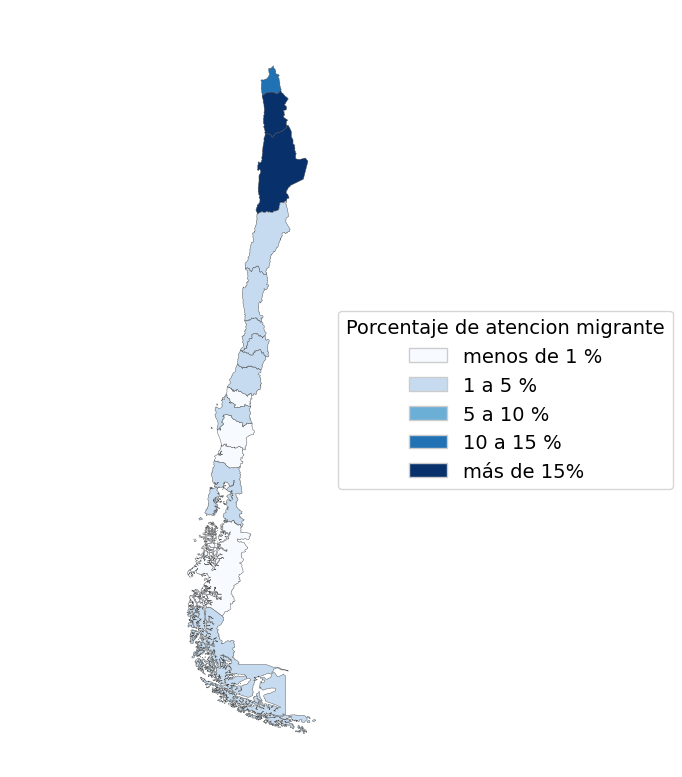

In [22]:
bins = [0, 1, 5, 10, 15, 100]
labels = ["menos de 1 %", "1 a 5 %", "5 a 10 %", "10 a 15 %", "más de 15%"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["porcentaje_migrantes_promedio"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("Blues", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   # Desactivamos la leyenda automática
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Porcentaje de atencion migrante",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 
# Título y formato
ax.set_title(f"Porcentaje de atencion migrante en salud publica", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.tight_layout()
plt.savefig(
    "../../../figures/pais/atenciones_migrante_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

## Densidad poblacional

### Grafico de resultados - Densidad poblacional
Se grafican los resultados obtenidos en orden ascendente.

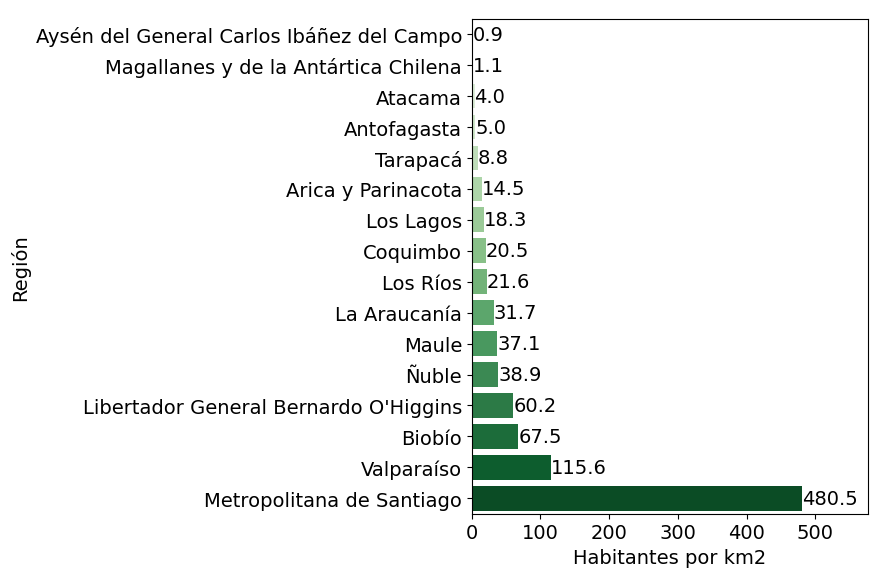

In [23]:
# Ordenar comunas
df_plot = merge_df.sort_values("densidad_poblacional", ascending=True)

plt.figure(figsize=graph_size)
sns.barplot(x="densidad_poblacional", y="Región", data=df_plot, palette="Greens", hue="Región")

plt.xlabel("Habitantes por km2")
plt.ylabel("Región")
plt.title(f"Densidad poblacional por región")

# Calculamos el valor máximo de la columna
max_valor = df_plot["densidad_poblacional"].max()

# Definimos el límite
plt.xlim(0, max_valor * 1.2)

# Mostrar valores al final de cada barra
for index, value in enumerate(df_plot["densidad_poblacional"]):
    plt.text(value, index, f"{value:.1f}", va='center')

plt.tight_layout()
plt.tight_layout()
plt.savefig(
    "../../../figures/pais/densidad_pais_grafico.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()

### Crear Mapa - Densidad poblacional
Se grafican los resultados obtenidos en un mapa de coropletas

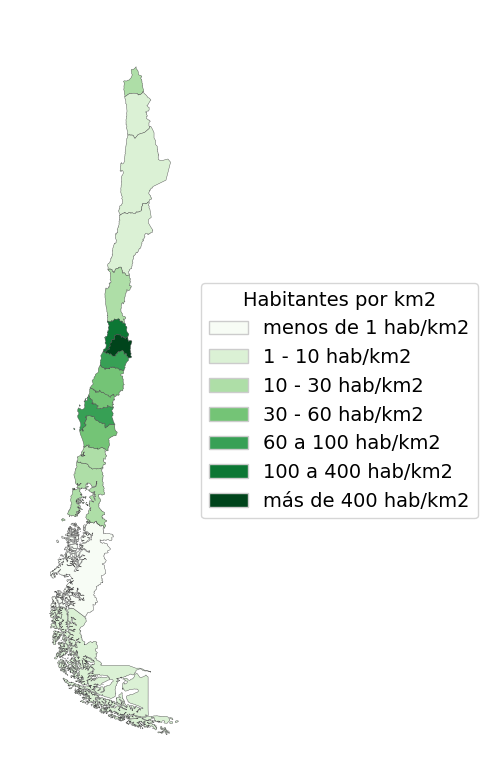

In [24]:
bins = [0, 1, 10, 30, 60, 100, 400, 100000]
labels = ["menos de 1 hab/km2", "1 - 10 hab/km2", "10 - 30 hab/km2", "30 - 60 hab/km2", "60 a 100 hab/km2", "100 a 400 hab/km2", "más de 400 hab/km2"]

# Crear nueva columna categórica
merge_df["categoria"] = pd.cut(merge_df["densidad_poblacional"], bins=bins, labels=labels, include_lowest=True)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=map_size)

# Colores del mapa (mismo número que categorías)
cmap = plt.get_cmap("Greens", len(labels))

# Graficar el mapa
merge_df.plot(column="categoria",
             cmap=cmap,
             linewidth=0.3,
             edgecolor="0.3",
             legend=False,   
             ax=ax)

# Crear leyenda manual con cuadrados
handles = [Patch(facecolor=cmap(i), edgecolor='0.8', label=labels[i]) for i in range(len(labels))]
ax.legend(handles=handles,
          title="Habitantes por km2",
          loc='center left',
          bbox_to_anchor=(1.05, 0.5),
          frameon=True)

ax.set_xlim(-76, -66) 
# Título y formato
ax.set_title(f"Densidad poblacional", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.savefig(
    "../../../figures/pais/densidad_pais_mapa.png", 
    dpi=300,                
    bbox_inches='tight'     
)
plt.show()